In [318]:
import torch
import torch.nn as nn
from torch import tensor

import pandas as pd
import numpy as np

from pathlib import Path

import matplotlib.pyplot as plt

%matplotlib inline

In [319]:
labels_table = pd.read_csv('cropped_lesion_labels.csv')

In [320]:
labels_table = labels_table.dropna(subset=['ClinSig'])

In [321]:
labels_table

,Unnamed: 0,ProxID,fid,pos,zone,ClinSig,Name,WorldMatrix,ijk,TopLevel,SpacingBetweenSlices,VoxelSpacing,Dim,DCMSerDescr,DCMSerNum,resized_lesion_col,resized_lesion_row,resized_lesion_slice,lesion_crop_filename
0,0,ProstateX-0000,1,25.7457 31.8707 -38.511,PZ,True,t2_tse_tra0,"0.5,1.00168e-010,0.00377059,-57.9373,-0.000199...",167 224 9,1.0,3.0,"0.5,0.5,3",384x384x19x1,t2_tse_tra,4,139.166667,186.666667,2,ProstateX-0000_7_cropped.npy
1,1,ProstateX-0001,1,-40.5367071921656 29.320722668457 -16.70766907...,AS,False,t2_tse_tra0,"0.5,1.02552e-010,-4.64581e-017,-119.205,-1.019...",157 186 10,1.0,3.0,"0.5,0.5,3",384x384x19x1,t2_tse_tra,6,130.833333,155.000000,2,ProstateX-0001_19_cropped.npy
2,2,ProstateX-0002,1,-27.0102 41.5467 -26.0469,PZ,True,t2_tse_tra0,"0.5,1.02552e-010,7.98512e-017,-103.784,-9.9634...",154 217 12,1.0,3.0,"0.5,0.5,3",384x384x19x1,t2_tse_tra,4,128.333333,180.833333,2,ProstateX-0002_41_cropped.npy
3,3,ProstateX-0002,2,-2.058 38.6752 -34.6104,PZ,False,t2_tse_tra0,"0.5,1.02552e-010,7.98512e-017,-103.784,-9.9634...",203 216 10,1.0,3.0,"0.5,0.5,3",384x384x19x1,t2_tse_tra,4,169.166667,180.000000,2,ProstateX-0002_40_cropped.npy
4,4,ProstateX-0003,1,22.1495 31.2717 -2.45933,TZ,False,t2_tse_tra0,"0.5,1.02552e-010,3.21757e-017,-98.0005,-8.5615...",240 205 12,1.0,3.0,"0.5,0.5,3",384x384x21x1,t2_tse_tra,3,200.000000,170.833333,2,ProstateX-0003_60_cropped.npy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,324,ProstateX-0201,1,10.1826 -10.0427 20.9151,AS,True,t2_tse_tra0,"0.56178,-0.0284585,0,-92.6812,0.0284585,0.5617...",191 163 16,NaN,3.0,"0.5625,0.5625,3",320x320x23x1,t2_tse_tra,4,191.000000,163.000000,2,ProstateX-0201_3654_cropped.npy
325,325,ProstateX-0202,1,-0.02085 -44.5506 16.7349,AS,True,t2_tse_tra0,"0.5625,1.15371e-010,-1.51273e-017,-94.1693,-1....",167 148 10,NaN,3.0,"0.5625,0.5625,3",320x320x21x1,t2_tse_tra,4,167.000000,148.000000,2,ProstateX-0202_3706_cropped.npy
326,326,ProstateX-0202,2,-12.8649 -21.7307 7.76273,PZ,False,t2_tse_tra0,"0.5625,1.15371e-010,-1.51273e-017,-94.1693,-1....",145 190 9,NaN,3.0,"0.5625,0.5625,3",320x320x21x1,t2_tse_tra,4,145.000000,190.000000,2,ProstateX-0202_3705_cropped.npy
327,327,ProstateX-0203,1,-10.02681 -18.5905 -75.1691,AS,True,t2_tse_tra0,"0.5625,1.15371e-010,-7.55701e-017,-91.2778,-1....",144 132 11,NaN,3.0,"0.5625,0.5625,3",320x320x19x1,t2_tse_tra,4,144.000000,132.000000,2,ProstateX-0203_3795_cropped.npy


In [322]:
NUM_IMAGES = labels_table['lesion_crop_filename'].shape[0]

IMAGE_SHAPE = (5, 64, 64)
NUM_SLICES, SIZE, _ = IMAGE_SHAPE

images = np.empty((NUM_IMAGES, *IMAGE_SHAPE), dtype=np.float32)

sig_labels = labels_table['ClinSig'].to_numpy().astype(np.int64)
sig_labels = torch.tensor(sig_labels, dtype=torch.long)

In [323]:
for ix, row in labels_table.iterrows():
    img_file = open(Path('cropped_lesions') / row['lesion_crop_filename'], 'rb')
    images[ix] = np.load(img_file)
    img_file.close()

In [324]:
images.shape

(329, 5, 64, 64)

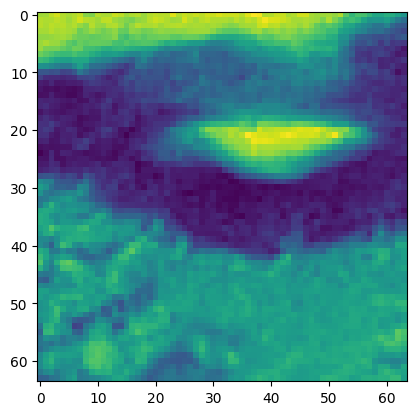

In [325]:
plt.imshow(images[0, 0])

In [326]:
images

array([[[[ 659.,  662.,  692., ...,  479.,  444.,  410.],
         [ 681.,  672.,  675., ...,  388.,  326.,  288.],
         [ 683.,  668.,  687., ...,  275.,  233.,  227.],
         ...,
         [ 375.,  438.,  458., ...,  393.,  386.,  462.],
         [ 320.,  371.,  395., ...,  487.,  467.,  449.],
         [ 250.,  258.,  300., ...,  514.,  514.,  437.]],

        [[ 436.,  424.,  437., ...,  160.,  158.,  150.],
         [ 368.,  362.,  343., ...,  108.,  133.,   68.],
         [ 282.,  287.,  303., ...,  109.,  149.,  106.],
         ...,
         [ 316.,  388.,  316., ...,  198.,  116.,  114.],
         [ 300.,  325.,  365., ...,  397.,  240.,  142.],
         [ 296.,  229.,  239., ...,  436.,  404.,  265.]],

        [[  80.,   73.,   68., ...,   69.,  108.,   89.],
         [  35.,   46.,  107., ...,   87.,   84.,   85.],
         [  35.,   20.,   53., ...,   81.,   68.,  111.],
         ...,
         [ 219.,  239.,  176., ...,  188.,  184.,  193.],
         [ 174.,  229.,  1

In [327]:
images = tensor(images)
images.shape

torch.Size([329, 5, 64, 64])

In [328]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F

data = images
labels = sig_labels

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

class ProstateDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        x = self.data[index]
        y = self.targets[index]

        x = F.normalize(x)

        return x, y

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator = torch.Generator(device)

train_dataset = ProstateDataset(train_data, train_labels)
test_dataset = ProstateDataset(test_data, test_labels)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, generator=generator)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [329]:
for d in train_loader:
    print(d[0].dtype)
    print(d[0].shape)
    print(d[1])
    print(d[1].shape)
    break

torch.float32
torch.Size([32, 5, 64, 64])
tensor([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
        1, 1, 0, 0, 0, 1, 0, 1])
torch.Size([32])


In [330]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=5, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 16 * 16, 128)
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 16 * 16)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNNModel()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [331]:
import torch
from torch.utils.data import DataLoader

model = CNNModel().to(device)

num_epochs = 10
learning_rate = 0.001

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(ProstateDataset)}], Loss: {loss.item():.4f}')

print("Training complete.")


Training complete.


In [332]:
model.eval()

total = 0
correct = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)

        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)

        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the test images: {accuracy:.2f}%')


Accuracy of the model on the test images: 72.73%
